## **Predicting Coronary Heart Disease Risk Using Decision Tree Classifier and SMOTE Balancing**

### **Importing necessary libraries**

In [99]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_excel(r"D:\Machine_Learning\Decision_Tree\Datasets\Heartattack_prediction_data.xlsx")

### **Data Exploration**

In [104]:
df.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [105]:
#pip install openpyxl

In [106]:
df.shape

(4312, 14)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


### **Dta Cleaning**

In [109]:
df.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [110]:
df.duplicated().sum()

np.int64(68)

In [111]:
df['RiskOfCHD'].value_counts()

RiskOfCHD
0    3654
1     658
Name: count, dtype: int64

In [112]:
df1 = df.dropna()

In [113]:
df1.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [114]:
df1.drop_duplicates(inplace=True)

In [115]:
df1.duplicated().sum()

np.int64(0)

In [116]:
df1.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
Sex,3949.000000,0.436313,0.495990,0.000000,0.000000,0.000000,1.000000,1.000000
Age,3949.000000,49.549253,8.561709,32.000000,42.000000,49.000000,56.000000,70.000000
Heart Rate,3949.000000,75.794125,12.017503,44.000000,68.000000,75.000000,83.000000,143.000000
Glucose,3949.000000,82.040010,23.496781,40.000000,72.000000,78.000000,87.000000,394.000000
BMI,3949.000000,25.797371,4.067156,15.540000,23.080000,25.380000,28.040000,56.800000
Smoker,3949.000000,0.489997,0.499963,0.000000,0.000000,0.000000,1.000000,1.000000
Ciggarates(Per Day),3949.000000,9.031907,11.962920,0.000000,0.000000,0.000000,20.000000,70.000000
Hypertension,3949.000000,0.309952,0.462532,0.000000,0.000000,0.000000,1.000000,1.000000
Systolic BP,3949.000000,132.273614,21.939643,83.500000,117.000000,128.000000,143.500000,295.000000
Diastolic BP,3949.000000,82.869840,11.881098,48.000000,75.000000,82.000000,89.500000,142.500000


### **Univeriate Analysis**

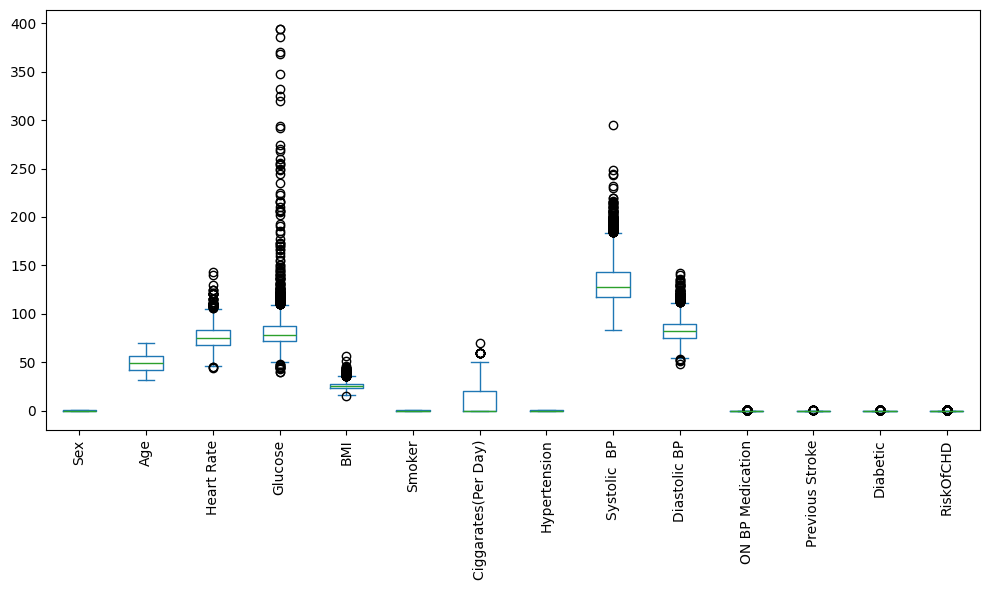

In [118]:
df1.plot(kind='box',figsize=(10,6))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

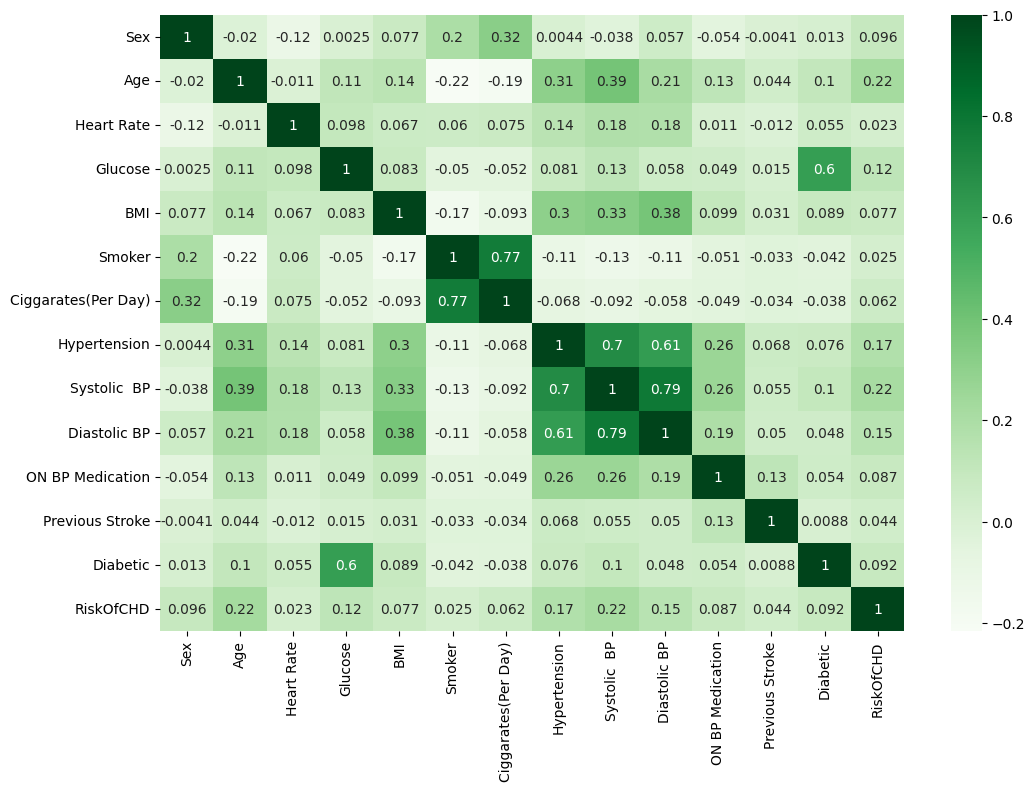

In [119]:
corr = df1.corr()
corr

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

In [120]:
df1.columns

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

### **Model Building**

In [121]:
x = df1.drop('RiskOfCHD', axis=1)
y = df1['RiskOfCHD']

In [122]:
x_train,x_test, y_train,y_test = train_test_split(x,y,stratify=y, test_size=0.2, train_size=0.8, random_state=42)

### **Apply SMOTE**

In [123]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

# Check class distribution
print("Before:", y_train.value_counts())
print("After:", y_train_resampled.value_counts())

Before: RiskOfCHD
0    2680
1     479
Name: count, dtype: int64
After: RiskOfCHD
0    2680
1    2680
Name: count, dtype: int64


### **Initilaizing The Model**

In [125]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

In [126]:
y_pred = pipeline.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [127]:
import math

# Function to calculate entropy
def entropy(column):
    counts = column.value_counts()
    probabilities = counts / len(column)
    return -sum(probabilities * probabilities.apply(math.log2))

# Function to calculate conditional entropy
def conditional_entropy(data, feature, target):
    feature_values = data[feature].unique()  # Corrected: use .unique() on the series
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

# Function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_conditional_entropy = conditional_entropy(data, feature, target)
    return total_entropy - feature_conditional_entropy


# Calculate information gain for each feature

for feature in x:
    ig = information_gain(df1,feature,'RiskOfCHD')
    print(f"Information Gain for {feature}: {ig}")

Information Gain for Sex: 0.006631933417966862
Information Gain for Age: 0.0422524322368345
Information Gain for Heart Rate: 0.013790087396667428
Information Gain for Glucose: 0.04161416939385465
Information Gain for BMI: 0.25335982980047883
Information Gain for Smoker: 0.00044004241884787465
Information Gain for Ciggarates(Per Day): 0.00727441275411278
Information Gain for Hypertension: 0.020625371664296344
Information Gain for Systolic  BP: 0.08124125071563493
Information Gain for Diastolic BP: 0.04730874057364798
Information Gain for ON BP Medication: 0.004342895811076941
Information Gain for Previous Stroke: 0.0010929406459186941
Information Gain for Diabetic: 0.004853281987031943


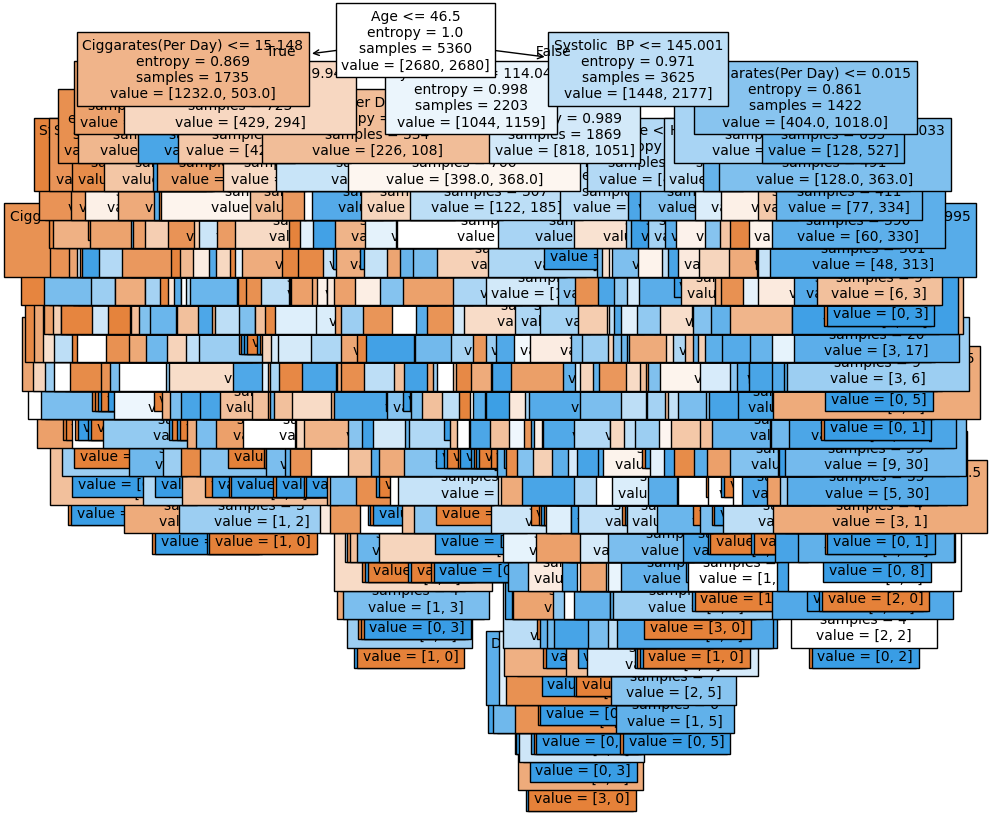

In [128]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names=x.columns, filled=True, fontsize=10)
plt.show()

### **Evaluate the model**

In [129]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 69.62025316455697
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       670
           1       0.20      0.33      0.25       120

    accuracy                           0.70       790
   macro avg       0.53      0.55      0.53       790
weighted avg       0.76      0.70      0.72       790

Confusion Matrix:
 [[510 160]
 [ 80  40]]


### **Predict The Data**

In [131]:
x_test.head(1)

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic
1904,1,64,80.0,58.0,21.03,1,20.0,0,113.5,70.0,0.0,0,0


In [132]:
new_data = [[1,50,70,45,22,1,0,0,120,80,0,0,1]]
prediction = model.predict(new_data)
if prediction[0] == 0:
    print('No RishofCHD')
else:
    print('RishofCHD')

No RishofCHD


In [133]:
import joblib

joblib.dump(model, "RiskOfCHD.pkl")

['RiskOfCHD.pkl']

In [134]:
riskofCHD = joblib.load('RiskOfCHD.pkl')
riskofCHD

DecisionTreeClassifier(criterion='entropy')

In [135]:
new_data = [[1,60,72,45,22,1,0,0,122,82,0,0,1]]
prediction = riskofCHD.predict(new_data)
if prediction[0] == 0:
    print('No RishofCHD')
else:
    print('RishofCHD')

No RishofCHD
